<a href="https://colab.research.google.com/github/ankitashrivastav12/ML-MODELS/blob/main/Program_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:09<00:00, 52.9MB/s]
100% 1.06G/1.06G [00:09<00:00, 120MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,InputLayer

In [5]:
train= keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

test= keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
train= train.map(process)
test =test.map(process)

In [7]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=500
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train =train_datagen.flow_from_directory("/content/train", class_mode="binary", batch_size=batch_size, target_size=(128,128))
val = test_datagen.flow_from_directory("/content/test", class_mode="binary", batch_size=batch_size, target_size=(128, 128))

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
model = Sequential()
model.add(InputLayer(input_shape=(128,128, 3)))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [10]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit_generator(train,steps_per_epoch=20, epochs=10, validation_data=val)

<ipython-input-11-87e22b304e21>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train,steps_per_epoch=20, epochs=10, validation_data=val)


Epoch 1/10
20/20 [==============================] - 89s 4s/step - loss: 0.7033 - accuracy: 0.5190 - val_loss: 0.6904 - val_accuracy: 0.5908
Epoch 2/10
20/20 [==============================] - 72s 4s/step - loss: 0.6909 - accuracy: 0.5372 - val_loss: 0.6908 - val_accuracy: 0.5006
Epoch 3/10
20/20 [==============================] - 63s 3s/step - loss: 0.6938 - accuracy: 0.5541 - val_loss: 0.6819 - val_accuracy: 0.6046
Epoch 4/10
20/20 [==============================] - 72s 4s/step - loss: 0.6841 - accuracy: 0.5627 - val_loss: 0.6610 - val_accuracy: 0.6246
Epoch 5/10
20/20 [==============================] - 62s 3s/step - loss: 0.6658 - accuracy: 0.5943 - val_loss: 0.6317 - val_accuracy: 0.6548
Epoch 6/10
20/20 [==============================] - 62s 3s/step - loss: 0.6486 - accuracy: 0.6257 - val_loss: 0.6160 - val_accuracy: 0.6510
Epoch 7/10
20/20 [==============================] - 71s 4s/step - loss: 0.6308 - accuracy: 0.6382 - val_loss: 0.5903 - val_accuracy: 0.6870
Epoch 8/10
20/20 [==

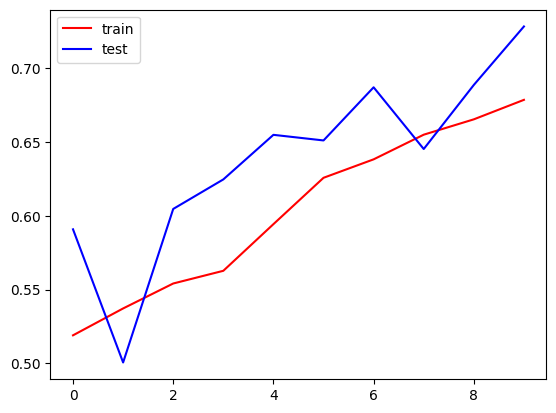

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

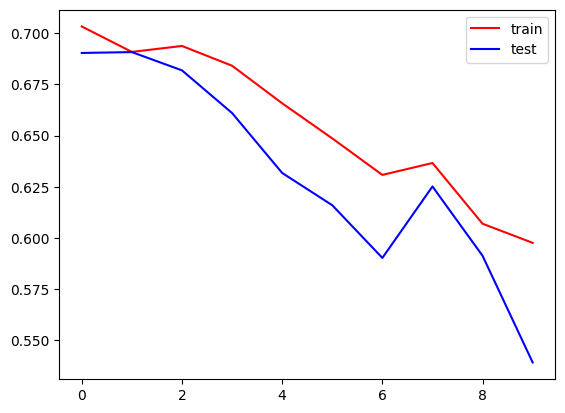

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

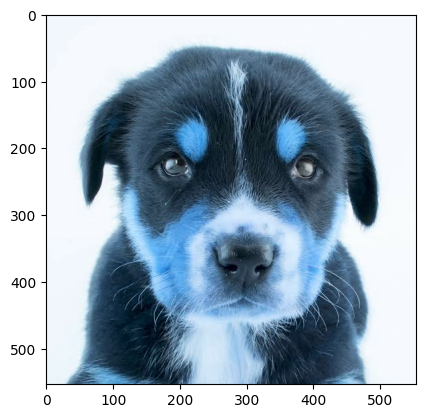

In [14]:
import cv2
test_img = cv2.imread('/content/dog.jpeg')
plt.imshow(test_img)

In [15]:
test_img = cv2.resize(test_img,(128,128))
test_input = test_img.reshape((1,128,128,3))
model.predict(test_input)

1/1 [==============================] - 0s 328ms/step


array([[1.]], dtype=float32)

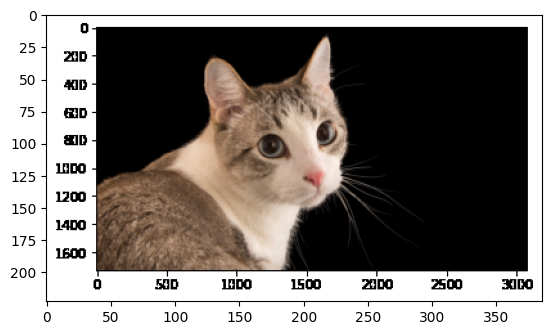

In [17]:
import cv2
test_img = cv2.imread('/content/cat.png')
plt.imshow(test_img)

In [18]:
test_img = cv2.resize(test_img,(128,128))
test_input = test_img.reshape((1,128,128,3))
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)